In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm

# Load the data
data = pd.read_csv('bt.csv', index_col='Date')

# Select two columns as targets (for example, column 1 and column 2)
targets = data[['1', '2']]

# Preprocess the data if necessary (e.g., scaling, filling missing values)
# For simplicity, we'll assume the data is clean and ready to use.

# Convert the data to numpy array
X = targets.values

# Train a Gaussian HMM
# Assume we want 4 hidden states
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=100)

# Fit the model
model.fit(X)

# Predict the hidden states for the input data
hidden_states = model.predict(X)

# Print the results
print("Transition matrix")
print(model.transmat_)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print(f"Hidden state {i}")
    print("Mean =", model.means_[i])
    print("Variance =", np.diag(model.covars_[i]))

print("Predicted hidden states")
print(hidden_states)


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Transition matrix
[[6.69354835e-001 3.22580671e-002 8.47325116e-002 2.13654586e-001]
 [1.66666667e-001 8.33333333e-001 1.43376131e-154 3.55134931e-145]
 [7.24055630e-002 1.03918884e-150 5.36239691e-001 3.91354746e-001]
 [2.36165755e-001 4.79286884e-128 2.15996663e-001 5.47837583e-001]]
Means and vars of each hidden state
Hidden state 0
Mean = [1065.26612933 1065.26612933]
Variance = [14.55344845 14.55344845]
Hidden state 1
Mean = [1388.98749348 1388.98749348]
Variance = [9601.480098 9601.480098]
Hidden state 2
Mean = [957.97536798 957.98235498]
Variance = [473.34839099 473.45834371]
Hidden state 3
Mean = [1006.47197153 1006.47198804]
Variance = [197.88486512 197.88354858]
Predicted hidden states
[2 3 3 3 0 0 0 0 0 2 3 0 0 0 0 0 3 0 0 0 0 0 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 0 3 3 3 3
 0 0 0 0 0 2 3 3 3 0 0 0 2 3 0 3 3 3 3 2 3 0 0 0 3 2 2 2 0 0 0 0 0 3 0 0 0
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 3 3 3 2 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Đọc dữ liệu từ file CSV
file_path = 'bt.csv'
data = pd.read_csv(file_path)

# Chọn cột 9 và cột 10 làm mục tiêu
target_columns = data.columns[9:11]
target_data = data[target_columns]
target_data


,9,10
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.1,1002.1
4,1061.5,1061.5
...,...,...
360,1002.0,1002.0
361,1002.0,1002.0
362,1061.5,1061.5
363,1022.6,1022.6


In [15]:
# Ánh xạ các giá trị thành chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)
indexed_data

C:\Users\MSI\AppData\Local\Temp\ipykernel_7860\2429345538.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)


,9,10
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
360,7,7
361,7,7
362,4,4
363,21,21


In [16]:
# Lấy giá trị từ các cột mục tiêu
values = indexed_data.values

# Tạo ma trận chuyển tiếp
num_states = len(unique_values)
transition_matrix = np.zeros((num_states, num_states))

# Tính xác suất chuyển tiếp
for i in range(len(values) - 1):
    for j in range(len(values[0])):
        transition_matrix[values[i, j], values[i + 1, j]] += 1

# Chuẩn hóa ma trận chuyển tiếp
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)


In [17]:
# Chuyển đổi dữ liệu thành định dạng phù hợp cho HMM
data_hmm = values.reshape(-1, 1)

# Xây dựng mô hình HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.fit(data_hmm)

# In các thông số của mô hình HMM
print("Transition matrix:\n", model.transmat_)
print("Means:\n", model.means_)
print("Covariances:\n", model.covars_)


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Transition matrix:
 [[0.75694667 0.24305333]
 [0.12538111 0.87461889]]
Means:
 [[23.14731248]
 [ 6.29032874]]
Covariances:
 [[[31.27336112]]

 [[11.87497363]]]


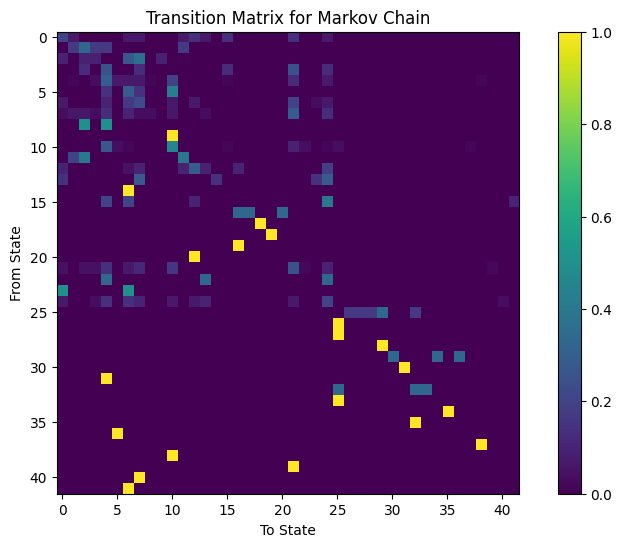

In [19]:
# Biểu đồ ma trận chuyển tiếp của chuỗi Markov
plt.figure(figsize=(10, 6))
plt.imshow(transition_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix for Markov Chain')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()


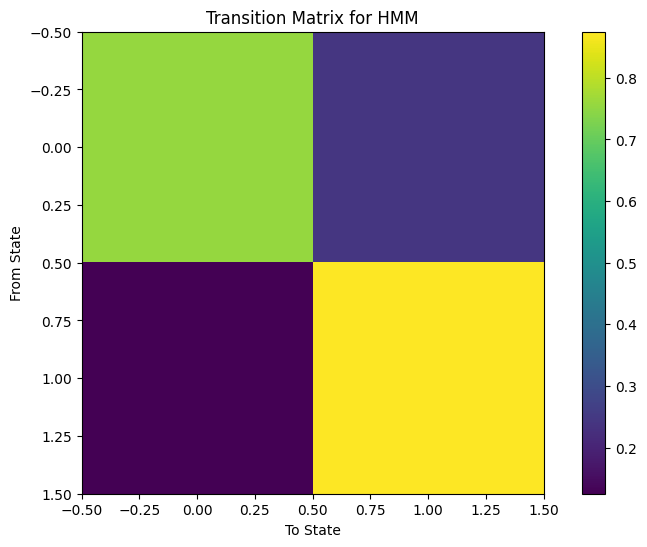

In [20]:
# Biểu đồ ma trận chuyển tiếp của mô hình HMM
plt.figure(figsize=(10, 6))
plt.imshow(model.transmat_, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix for HMM')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()


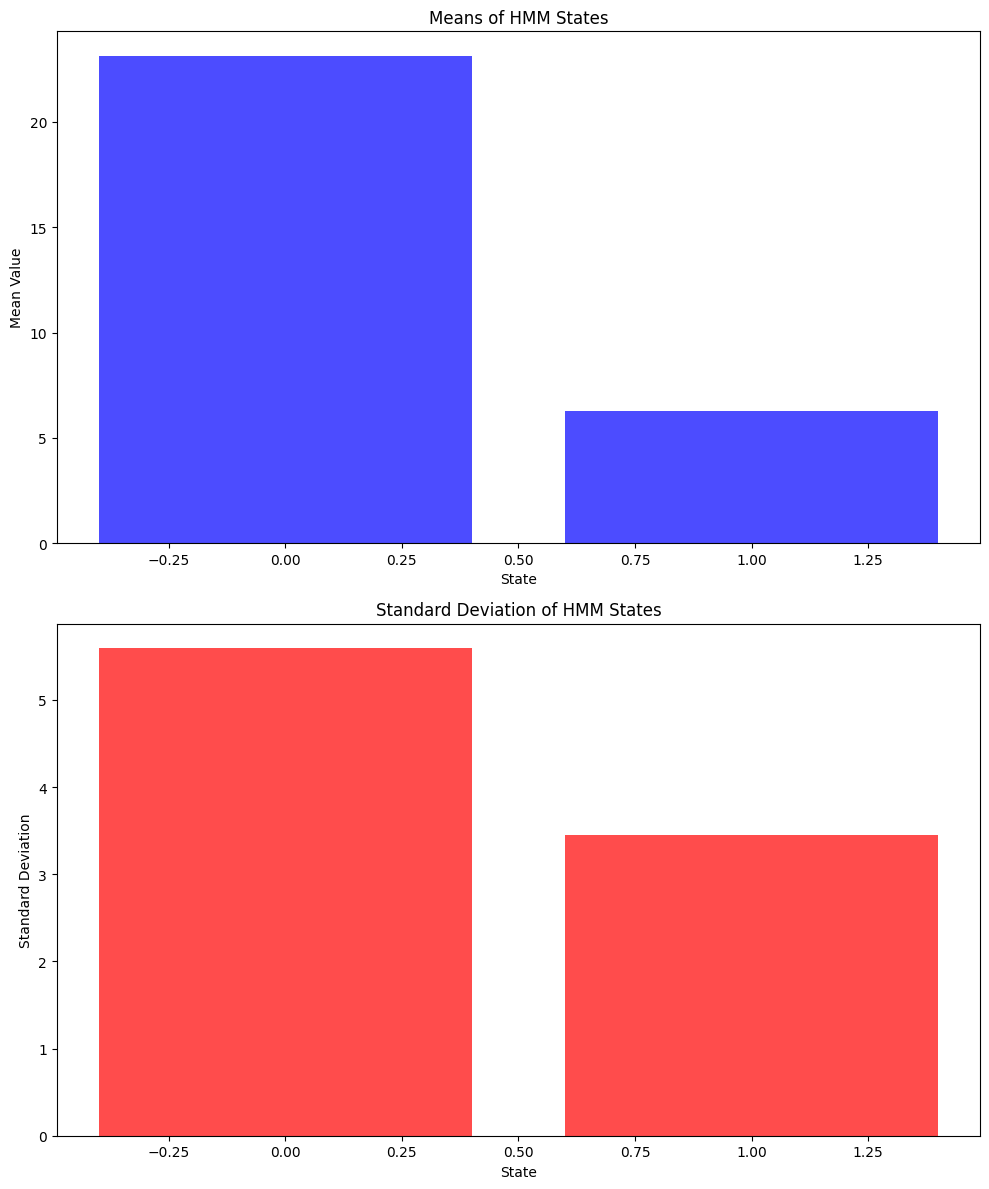

In [22]:
# Biểu đồ giá trị trung bình và phương sai của các trạng thái trong HMM
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Giá trị trung bình
ax[0].bar(range(model.n_components), model.means_.flatten(), color='blue', alpha=0.7)
ax[0].set_title('Means of HMM States')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Mean Value')

# Phương sai
ax[1].bar(range(model.n_components), np.sqrt(model.covars_.flatten()), color='red', alpha=0.7)
ax[1].set_title('Standard Deviation of HMM States')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_7860\290238736.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


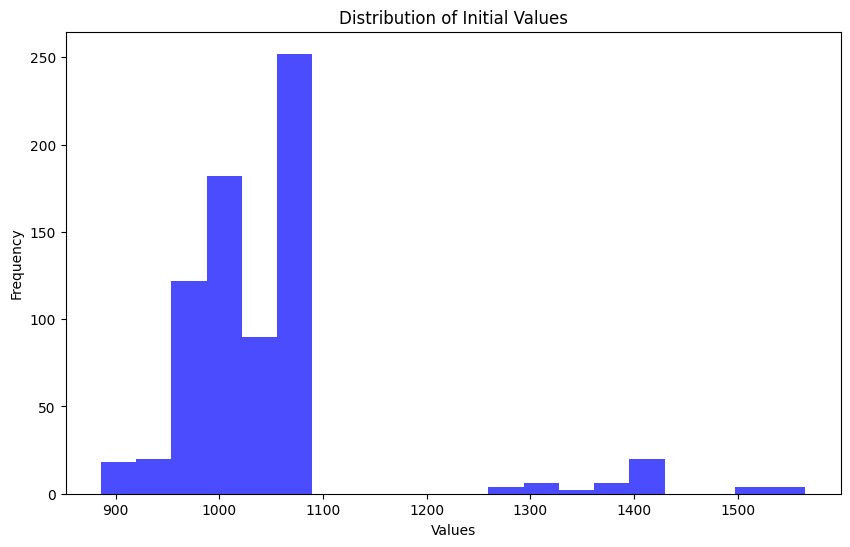

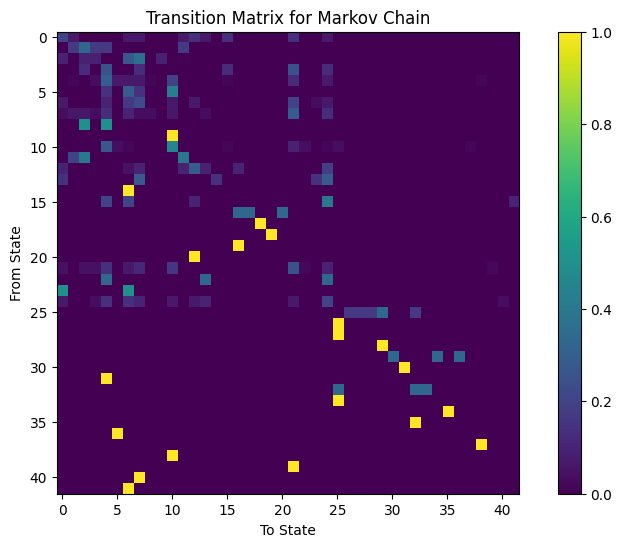

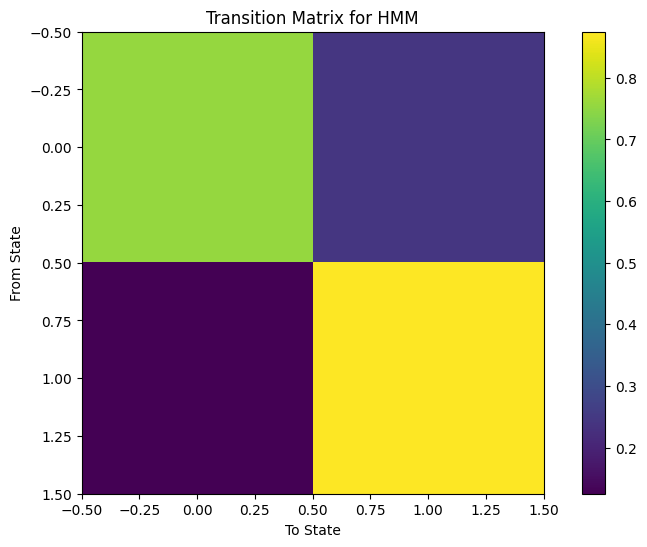

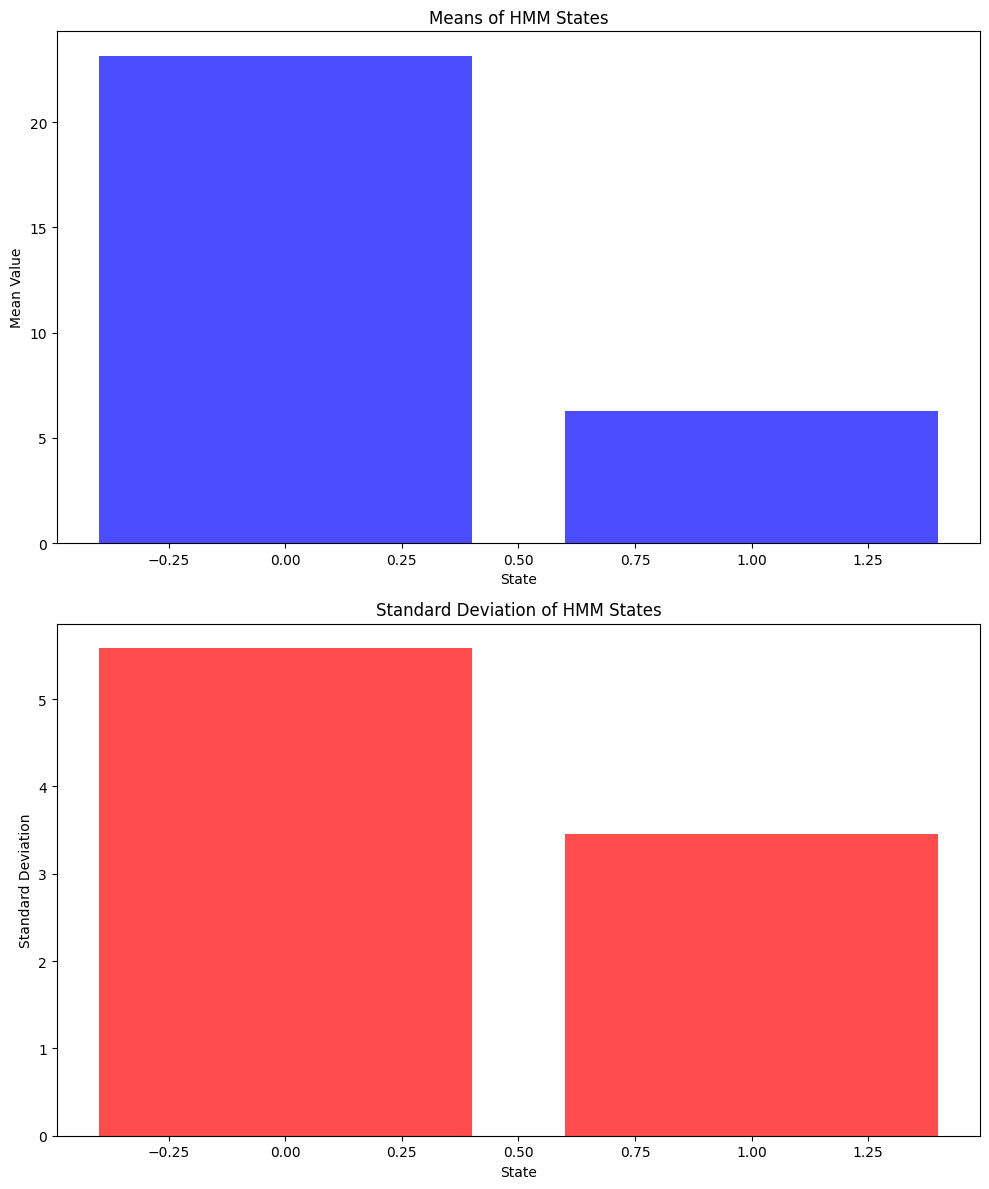

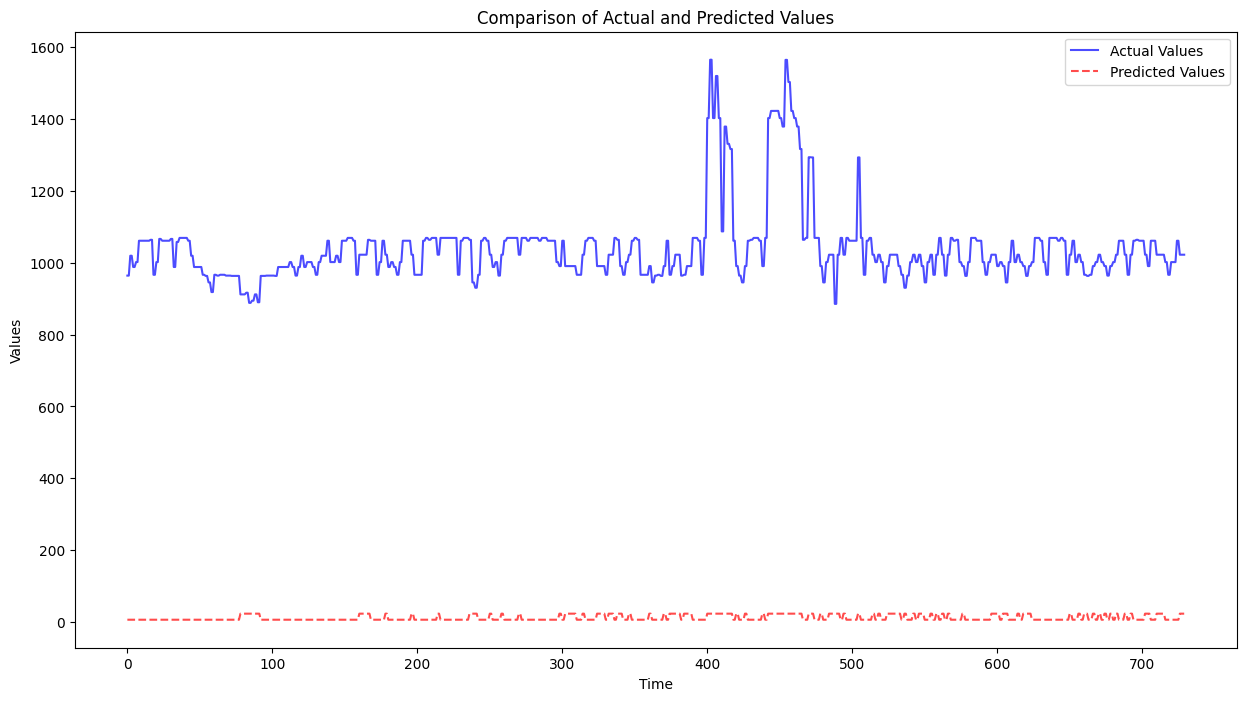

Log-Likelihood: -2347.3957128116554
BIC Score: 4740.9427373623075
Predicted Mean Value for Next Step: [23.16147384]
Predicted Covariance for Next Step: [[31.15416876]]
Transition matrix
[[0.7567078  0.2432922 ]
 [0.12525719 0.87474281]]
Means and vars of each hidden state
Hidden state 0
Mean = [23.16147384]
Variance = [31.15416876]
Hidden state 1
Mean = [6.29433225]
Variance = [11.89446654]
Predicted hidden states
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Bước 1: Đọc dữ liệu từ file CSV
file_path = 'bt.csv'
data = pd.read_csv(file_path)

# Bước 2: Chọn cột 9 và cột 10 làm mục tiêu
target_columns = data.columns[9:11]
target_data = data[target_columns]

# Bước 3: Ánh xạ các giá trị thành các chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
index_to_value = {i: v for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)

# Bước 4: Xây dựng ma trận chuyển tiếp cho chuỗi Markov
values = indexed_data.values
num_states = len(unique_values)
transition_matrix = np.zeros((num_states, num_states))

for i in range(len(values) - 1):
    for j in range(len(values[0])):
        transition_matrix[values[i, j], values[i + 1, j]] += 1

transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Bước 5: Xây dựng mô hình HMM
data_hmm = values.reshape(-1, 1)
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.fit(data_hmm)

# Bước 6: Dự đoán trạng thái ẩn và giá trị tiếp theo
hidden_states = model.predict(data_hmm)

# Lấy trạng thái ẩn cuối cùng
last_hidden_state = hidden_states[-1]

# Tính xác suất chuyển tiếp từ trạng thái ẩn hiện tại sang trạng thái ẩn tiếp theo
next_hidden_state_prob = model.transmat_[last_hidden_state]

# Chọn trạng thái ẩn tiếp theo với xác suất cao nhất
next_hidden_state = np.argmax(next_hidden_state_prob)

# Lấy giá trị dự đoán từ trạng thái ẩn tiếp theo
predicted_value_mean = model.means_[next_hidden_state]
predicted_value_cov = model.covars_[next_hidden_state]

# Dự đoán toàn bộ chuỗi
predicted_hidden_states = model.predict(data_hmm)
predicted_values = model.means_[predicted_hidden_states].flatten()

# Biểu đồ trực quan hóa dữ liệu và kết quả
# Biểu đồ phân phối các giá trị ban đầu
plt.figure(figsize=(10, 6))
plt.hist(target_data.values.ravel(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Initial Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Biểu đồ ma trận chuyển tiếp của chuỗi Markov
plt.figure(figsize=(10, 6))
plt.imshow(transition_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix for Markov Chain')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Biểu đồ ma trận chuyển tiếp của mô hình HMM
plt.figure(figsize=(10, 6))
plt.imshow(model.transmat_, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix for HMM')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

# Biểu đồ giá trị trung bình và phương sai của các trạng thái trong HMM
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Giá trị trung bình
ax[0].bar(range(model.n_components), model.means_.flatten(), color='blue', alpha=0.7)
ax[0].set_title('Means of HMM States')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Mean Value')

# Phương sai
ax[1].bar(range(model.n_components), np.sqrt(model.covars_.flatten()), color='red', alpha=0.7)
ax[1].set_title('Standard Deviation of HMM States')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(15, 8))
plt.plot(target_data.values.flatten(), label='Actual Values', color='blue', alpha=0.7)
plt.plot(predicted_values, label='Predicted Values', color='red', linestyle='dashed', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Đo lường hiệu suất của mô hình
log_likelihood = model.score(data_hmm)
bic_score = model.bic(data_hmm)
print("Log-Likelihood:", log_likelihood)
print("BIC Score:", bic_score)

# In thông số của dự đoán tiếp theo
print("Predicted Mean Value for Next Step:", predicted_value_mean)
print("Predicted Covariance for Next Step:", predicted_value_cov)
# Print the results
print("Transition matrix")
print(model.transmat_)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print(f"Hidden state {i}")
    print("Mean =", model.means_[i])
    print("Variance =", np.diag(model.covars_[i]))

print("Predicted hidden states")
print(hidden_states)

C:\Users\MSI\AppData\Local\Temp\ipykernel_7860\4124831585.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


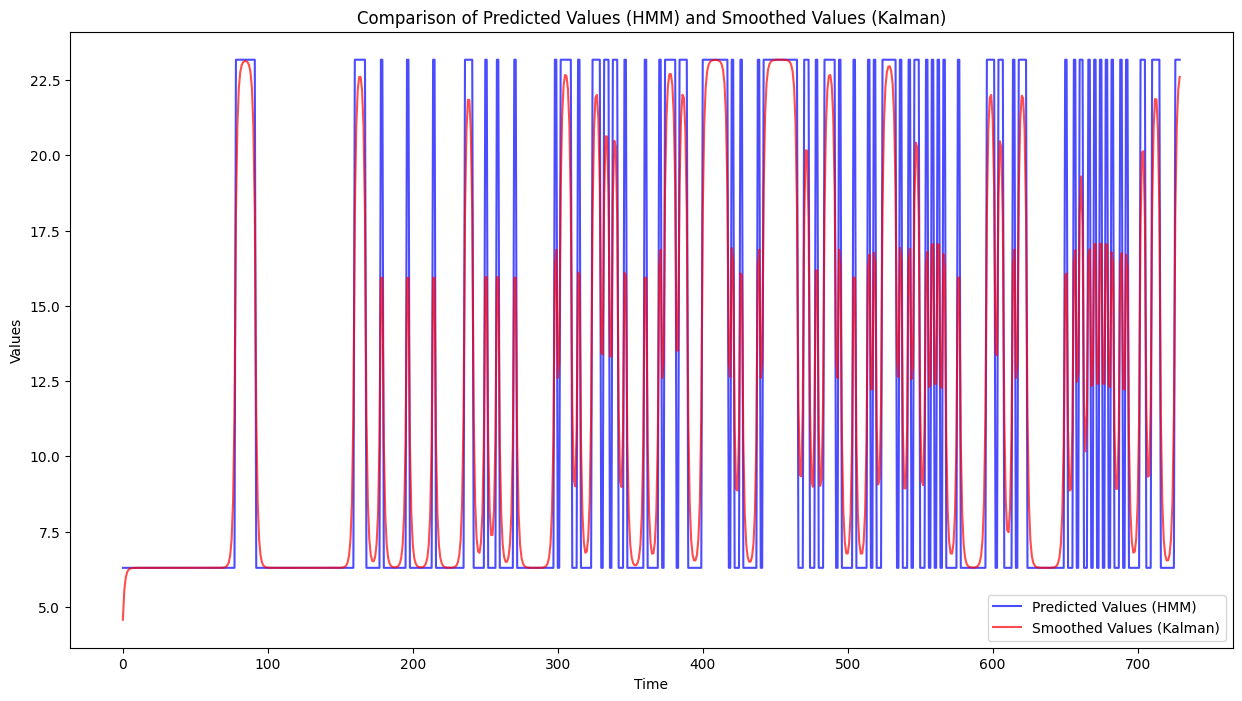

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from pykalman import KalmanFilter

# Bước 1: Đọc dữ liệu từ file CSV
file_path = 'bt.csv'
data = pd.read_csv(file_path)

# Bước 2: Chọn cột 9 và cột 10 làm mục tiêu
target_columns = data.columns[9:11]
target_data = data[target_columns]

# Bước 3: Ánh xạ các giá trị thành các chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
index_to_value = {i: v for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)

# Bước 4: Xây dựng ma trận chuyển tiếp cho chuỗi Markov
values = indexed_data.values
num_states = len(unique_values)
transition_matrix = np.zeros((num_states, num_states))

for i in range(len(values) - 1):
    for j in range(len(values[0])):
        transition_matrix[values[i, j], values[i + 1, j]] += 1

transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Bước 5: Xây dựng mô hình HMM
data_hmm = values.reshape(-1, 1)
model_hmm = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model_hmm.fit(data_hmm)

# Bước 6: Dự đoán trạng thái ẩn và giá trị tiếp theo từ mô hình HMM
hidden_states = model_hmm.predict(data_hmm)
predicted_values_hmm = model_hmm.means_[hidden_states].flatten()

# Bước 7: Kết hợp mô hình HMM với bộ lọc Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
smoothed_values_kalman = kf.em(predicted_values_hmm).smooth(predicted_values_hmm)[0]

# Biểu đồ so sánh giá trị dự đoán của HMM và giá trị sau khi điều chỉnh bằng Kalman Filter
plt.figure(figsize=(15, 8))
plt.plot(predicted_values_hmm, label='Predicted Values (HMM)', color='blue', alpha=0.7)
plt.plot(smoothed_values_kalman, label='Smoothed Values (Kalman)', color='red', alpha=0.7)
plt.title('Comparison of Predicted Values (HMM) and Smoothed Values (Kalman)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MSI\AppData\Local\Temp\ipykernel_7860\578189252.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  indexed_data = target_data.applymap(value_to_index.get)
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less c

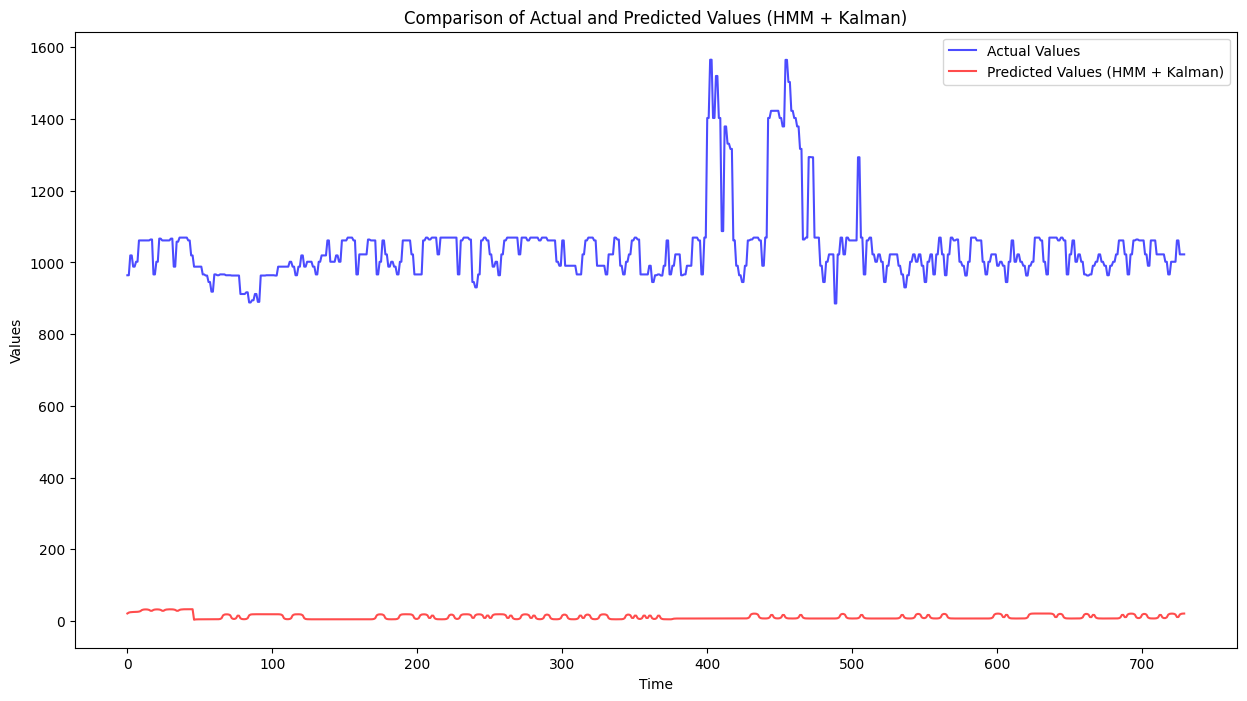

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from pykalman import KalmanFilter
from sklearn.cluster import KMeans

# Bước 1: Đọc dữ liệu từ file CSV
file_path = 'bt.csv'
data = pd.read_csv(file_path)

# Bước 2: Chọn cột 9 và cột 10 làm mục tiêu
target_columns = data.columns[9:11]
target_data = data[target_columns]

# Bước 3: Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(target_data)

# Bước 4: Ánh xạ các giá trị thành các chỉ số nguyên
unique_values = pd.unique(target_data.values.ravel())
value_to_index = {v: i for i, v in enumerate(unique_values)}
index_to_value = {i: v for i, v in enumerate(unique_values)}
indexed_data = target_data.applymap(value_to_index.get)

# Bước 5: Xây dựng mô hình HMM và dự đoán trạng thái ẩn và giá trị tiếp theo từ mỗi cụm dữ liệu
models_hmm = []
predicted_values_kalman = []

for cluster in range(kmeans.n_clusters):
    cluster_data = indexed_data[cluster_labels == cluster].values
    model_hmm = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
    model_hmm.fit(cluster_data.reshape(-1, 1))
    hidden_states = model_hmm.predict(cluster_data.reshape(-1, 1))
    predicted_values_hmm = model_hmm.means_[hidden_states].flatten()
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    smoothed_values_kalman = kf.em(predicted_values_hmm).smooth(predicted_values_hmm)[0]
    models_hmm.append(model_hmm)
    predicted_values_kalman.extend(smoothed_values_kalman)

# Biểu đồ so sánh giá trị dự đoán sau khi kết hợp cả ba phương pháp
plt.figure(figsize=(15, 8))
plt.plot(target_data.values.flatten(), label='Actual Values', color='blue', alpha=0.7)
plt.plot(predicted_values_kalman, label='Predicted Values (HMM + Kalman)', color='red', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values (HMM + Kalman)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
